Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

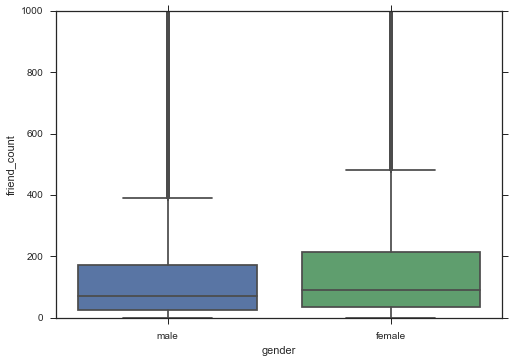

0.645909719907
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000  

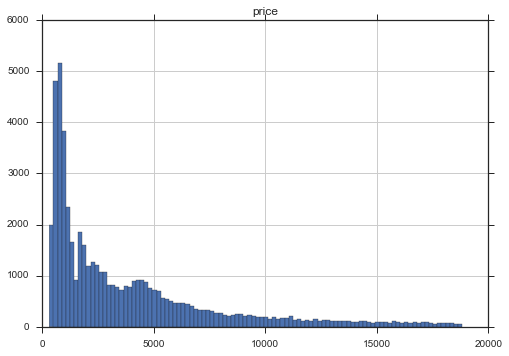

17290
0
16560


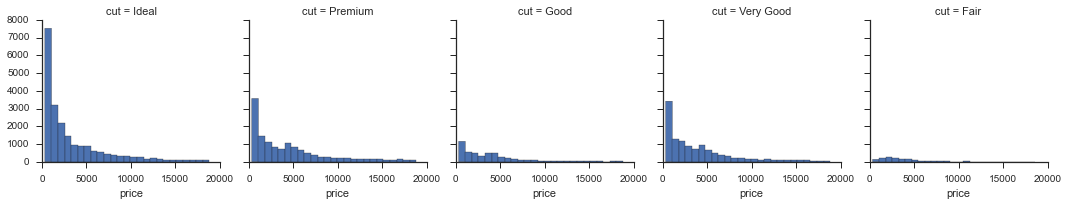

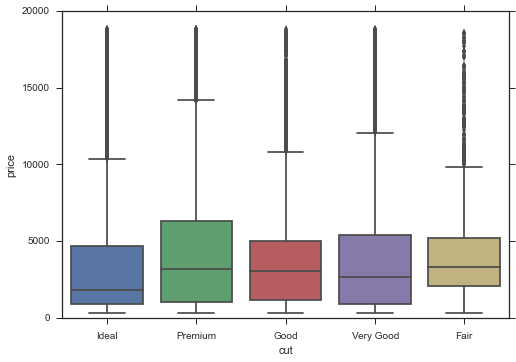

Ideal
326
18806
1810.0

Premium
326
18823
3185.0

Good
327
18788
3050.5

Very Good
336
18818
2648.0

Fair
337
18574
3282.0



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
from ggplot import diamonds
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

# df.hist(column='dob_day', bins=df.dob_day.unique().size)
# plt.show()

# p = ggplot(aes(x='dob_day', colour='dob_month'), data=df)
# p + geom_histogram(bins=df.dob_day.unique().size) + facet_wrap('dob_month')

sns.set(style="ticks", color_codes=True)
#g = sns.FacetGrid(df, col="dob_month", col_wrap=3)
#g = g.map(plt.hist, "dob_day", bins=df.dob_day.unique().size)
#plt.show()

#df.hist(column='friend_count', bins=100)
#plt.xlim((0,1000))
#plt.show()

#g = sns.FacetGrid(df, col="gender")
#g = g.map(plt.hist, "friend_count", bins=np.linspace(0,1000,100))
#plt.show()

#print   df[df.gender=='male'].describe()['friend_count']
#print df[df.gender=='female'].describe()['friend_count']

#years_round_up = (int(df.tenure.max()) / 365) + 1
#df.hist(column='tenure', bins=np.linspace(0,years_round_up*365,years_round_up+1))
#plt.show()

df.friend_count.describe()

#l = df.friend_count.size
#d = pd.DataFrame({'friend_count': pd.concat([df.friend_count, (df.friend_count+1).apply(np.log), df.friend_count.apply(np.sqrt)]),
                  #'friend_trans': np.concatenate([np.repeat('cnt',l), np.repeat('log',l), np.repeat('sqr',l)])})
#print d.head()

#g = sns.FacetGrid(d, col="friend_trans")
#g = g.map(plt.hist, "friend_count", bins=1000)
#plt.xlim((0,30))
#plt.show()

#df['log_www_likes'] = np.array((df['www_likes']+1).apply(np.log))

#g = sns.FacetGrid(df, col="gender")
#g = g.map(plt.hist, "log_likes", bins=25)
#plt.show()

#fig, ax = plt.subplots()
#sns.kdeplot((df[df['gender']==  'male'])['log_www_likes'], ax=ax, label='male')
#sns.kdeplot((df[df['gender']=='female'])['log_www_likes'], ax=ax, label='female')
#plt.legend()
#plt.show()

print (df[df['gender']==  'male']).friendships_initiated.describe()
print (df[df['gender']=='female']).friendships_initiated.describe()

ax = sns.boxplot(x='gender', y='friend_count', data=df[df.friend_count < 1000])
plt.show()

print float(df[df.mobile_likes > 0].size) / df.size

print diamonds.describe()
print diamonds.info()
print diamonds.color.unique()
for color in diamonds.color.unique():
    print color + ': ' + str((diamonds[diamonds.color == color]).size)
    
diamonds.hist(column='price', bins=100)
plt.show()

print diamonds[diamonds.price < 500].size
print diamonds[diamonds.price < 250].size
print diamonds[diamonds.price >= 15000].size

g = sns.FacetGrid(diamonds, col="cut")
g = g.map(plt.hist, "price", bins=25)
plt.show()

ax = sns.boxplot(x='cut', y='price', data=diamonds)
plt.show()

for cut in diamonds.cut.unique():
    print cut
    print diamonds[diamonds.cut==cut].price.min()
    print diamonds[diamonds.cut==cut].price.max()
    print diamonds[diamonds.cut==cut].price.median()
    print